In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 
plt.style.use("ggplot")

## Neural Network with 1 hidden layer  
The number of units in hidden layer can be different between XOR and Donut  


In [237]:
#Fact = 0    # sigmoid 
#Fact = 1    # tanh 
Fact = 2    # ReLU 

In [238]:
def forward(X, W1, b1, W2, b2):
    # sigmoid 
    if Fact == 0:
        Z = 1 / (1 + np.exp(-(X.dot(W1)+b1)))
    
    # tanh 
    if Fact == 1:
        Z = np.tanh(X.dot(W1)+b1)
    
    # ReLU 
    if Fact == 2:
        Z = X.dot(W1) + b1
        Z = Z * (Z>0) 
    
    activation = Z.dot(W2) + b2
    Y = 1 / (1 + np.exp(-activation))  # sigmoid for binary classification 
    return Y, Z 

In [239]:
def predict(X, W1, b1, W2, b2):
    Y, _ = forward(X, W1, b1, W2, b2)
    return np.round(Y)  # 0 or 1 at threshold 0.5 (sigmoid center)

In [240]:
# Sign of these ese delivertives are for gradient descent  
def derivative_w2(Z, T, Y): 
    return (Y - T).dot(Z)

def derivative_b2(T,Y): 
    return (Y-T).sum() 

def derivative_w1(X, Z, T, Y, W2):
    # Y-T:{1xN}, W2:{1xM}, outer:{NxM} 
    # X:{NxD}  {DxN}x{NxM} = {DxM} = shape of W1
    # {Nx1}x{1xM} in python : one way is to use outer({N,}, {M,})
    # Alternatively, reshape to {Nx1} & {1xM}, and use dot produduct as usual.  
    
    if Fact == 0: # sigmoid 
        dz = np.outer(Y-T, W2) * Z * (1-Z)     
    if Fact == 1: # tanh 
        dz = np.outer(Y-T, W2) * (1- Z*Z)     
    if Fact == 2: # ReLU 
        dz = np.outer(Y-T, W2) * (Z>0) 
        
    return X.T.dot(dz) 

def derivative_b1(Z, T, Y, W2): 
    if Fact == 0: # sigmoid
        dz = np.outer(Y-T, W2) * Z * (1-Z)   
    if Fact == 1: # tanh
        dz = np.outer(Y-T, W2) * (1- Z*Z)    
    if Fact == 2: # ReLU 
        dz = np.outer(Y-T, W2) * (Z>0)      
    return dz.sum(axis=0) 

In [241]:
def get_log_likelihood(T,Y): 
    return np.sum(T*np.log(Y) + (1-T)*np.log(1-Y))

## XOR test  
For some reason, ReLU activation function in hidden layer does not work sometimes... 

In [269]:
def test_xor(): 
    X = np.array([[0,0], [0,1], [1,0], [1,1]])
    Y = np.array([0, 1, 1, 0])
    M = 5 
    W1 = np.random.randn(2, M)   # D=2, M=5 
    b1 = np.random.randn(M)
    W2 = np.random.randn(M)
    b2 = np.random.randn(1) 
    
    LL = [] # keep track of log likelifood 
    EE = [] # keep track of errors
    learning_rate = 1e-1
    regularization = 0. 
    for i in range(30000):
        pY, Z = forward(X, W1, b1, W2, b2) 
        ll = get_log_likelihood( Y, pY ) 
        LL.append(ll) 
        
        prediction = predict(X, W1, b1, W2, b2) 
        er = np.mean( prediction != Y ) 
        EE.append(er)
        
#        if er == 0:
#            break
        
        # Gradiant Descent 
        W2 -= learning_rate * (derivative_w2(Z, Y, pY) + regularization * W2) 
        b2 -= learning_rate * (derivative_b2(Y, pY) + regularization * b2)
        W1 -= learning_rate * (derivative_w1(X, Z, Y, pY, W2) + regularization * W1)
        b1 -= learning_rate * (derivative_b1(Z, Y, pY, W2) + regularization * b1)
        if i % 1000 == 0: 
            print(ll, er) 
    
    print("final classification rate: ", np.mean(prediction == Y))
    plt.figure(figsize=(8,4))
    plt.plot(LL)
    plt.figure(figsize=(8,4))
    plt.plot(EE)
    
    return X, Y, W2, b2, W1, b1
    

-9.593252450838165 0.5
-0.01869864072022979 0.0
-0.008396302979976237 0.0
-0.005351986871469232 0.0
-0.0039083433536886356 0.0
-0.0030701293431823796 0.0
-0.0025231288377423134 0.0
-0.0021392277717201627 0.0
-0.0018553464372590425 0.0
-0.001636743383702428 0.0
-0.0014635832956451733 0.0
-0.0013230885531450927 0.0
-0.0012068421123417185 0.0
-0.0011091168340078364 0.0
-0.0010258868430728172 0.0
-0.0009540081394843358 0.0
-0.0008913911412262859 0.0
-0.0008364239590909428 0.0
-0.0007877415571338102 0.0
-0.0007443986353660306 0.0
-0.0007054325259583072 0.0
-0.0006702886570824443 0.0
-0.000638492691868528 0.0
-0.0006094707060265237 0.0
-0.0005829724535086409 0.0
-0.0005586733368086925 0.0
-0.0005362410300153572 0.0
-0.000515571000098451 0.0
-0.0004963672012755479 0.0
-0.00047854790790497056 0.0
final classification rate:  1.0


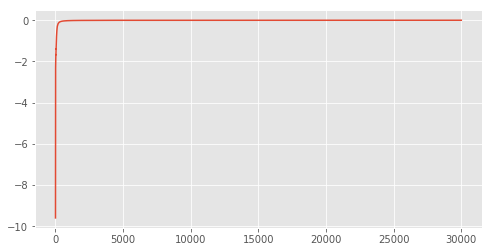

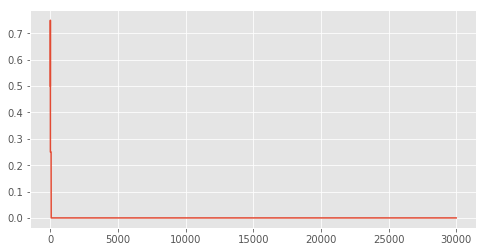

In [270]:
X, Y, W2, b2, W1, b1 = test_xor()

In [249]:
pY, Z = forward(X, W1, b1, W2, b2)
print(derivative_w2(Z, Y, pY))
print(derivative_b2(Y, pY))
print(derivative_w1(X, Z, Y, pY, W2))
print(derivative_b1(Z, Y, pY, W2))
print(Z)
print( X.dot(W1) + b1 )
print(W1)

[-5.48282939e-05 -1.10734719e-05  0.00000000e+00  0.00000000e+00
  1.18751745e-04  1.06604659e-04  0.00000000e+00  0.00000000e+00]
-1.5267211443456265e-05
[[-2.99873852e-06 -6.32312141e-07  0.00000000e+00  0.00000000e+00
   4.05477559e-06  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-3.09241390e-06 -6.52064474e-07  0.00000000e+00  0.00000000e+00
   4.18143973e-06  0.00000000e+00  0.00000000e+00  0.00000000e+00]]
[-5.67675002e-05 -1.19699598e-05  0.00000000e+00  0.00000000e+00
  2.13968665e-04 -1.82977365e-04  0.00000000e+00  0.00000000e+00]
[[ 3.74681372e+00  7.53528336e-01 -0.00000000e+00 -0.00000000e+00
  -0.00000000e+00  3.90624091e+00 -0.00000000e+00 -0.00000000e+00]
 [ 2.32446190e+00  3.59744438e-01 -0.00000000e+00 -0.00000000e+00
   2.89970272e-05 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00]
 [ 2.26860631e+00  6.25440569e-01 -0.00000000e+00 -0.00000000e+00
   3.38717239e-05 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00]
 [ 8.46254485e-01  2.31656671e-01 -0.00000000e+0

## Donut Test   
ReLU tends to give better result than sigmoid. 


In [161]:
def test_donut():
    N = 1000
    R_inner = 5
    R_outer = 10 
    
    R1 = np.random.randn(N//2) + R_inner
    theta = 2*np.pi*np.random.random(N//2)
    X_inner = np.concatenate([[R1 * np.cos(theta)], [R1 * np.sin(theta)]]).T

    R2 = np.random.randn(N//2) + R_outer
    theta = 2*np.pi*np.random.random(N//2)
    X_outer = np.concatenate([[R2 * np.cos(theta)], [R2 * np.sin(theta)]]).T
    
    X = np.concatenate([ X_inner, X_outer ])
    Y = np.array([0]*(N//2) + [1]*(N//2))
    
    n_hidden = 8
    W1 = np.random.randn(2, n_hidden)
    b1 = np.random.randn(n_hidden)
    W2 = np.random.randn(n_hidden)
    b2 = np.random.randn(1)
    LL = [] # keep track of log-likelihoods
    EE = [] 
    learning_rate = 0.00005
    regularization = 0.2
    for i in range(3000):
        pY, Z = forward(X, W1, b1, W2, b2)
        ll = get_log_likelihood(Y, pY)
        prediction = predict(X, W1, b1, W2, b2)
        er = np.abs(prediction - Y).mean()
        LL.append(ll)
        EE.append(er)
        W2 -= learning_rate * (derivative_w2(Z, Y, pY) + regularization * W2)
        b2 -= learning_rate * (derivative_b2(Y, pY) + regularization * b2)
        W1 -= learning_rate * (derivative_w1(X, Z, Y, pY, W2) + regularization * W1)
        b1 -= learning_rate * (derivative_b1(Z, Y, pY, W2) + regularization * b1)
        if i % 300 == 0:
            print("i:", i, "ll:", ll, "classification rate:", 1 - er)    
    
    print("final classification rate: ", np.mean(prediction == Y))
    plt.figure(figsize=(8,4))
    plt.plot(LL)
    plt.figure(figsize=(8,4))
    plt.plot(EE)  

i: 0 ll: -1261.345155846189 classification rate: 0.5
i: 300 ll: -642.9144246913894 classification rate: 0.642
i: 600 ll: -611.9808270331503 classification rate: 0.706
i: 900 ll: -584.4977172895094 classification rate: 0.71
i: 1200 ll: -558.339245071824 classification rate: 0.777
i: 1500 ll: -531.8700215868064 classification rate: 0.806
i: 1800 ll: -503.82650074376954 classification rate: 0.867
i: 2100 ll: -471.5543230359425 classification rate: 0.895
i: 2400 ll: -434.94621531021005 classification rate: 0.937
i: 2700 ll: -398.47284153248387 classification rate: 0.965
final classification rate:  0.966


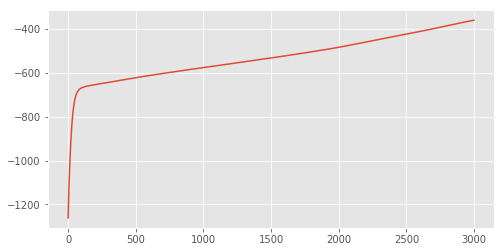

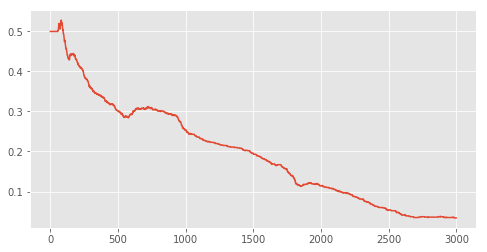

In [162]:
test_donut()